In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import openweathermapy.core as owm
import datetime

from api_keys import api_key
settings = {"units": "imperial", "appid": api_key}

lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city_data not in cities:
        cities.append(city_data)

# Print the city count to confirm sufficient count
len(cities)

639

In [3]:
weather_data = []

print("Beginning Data Retrieval")
print("---------------------------------")
counter = 1
set_counter = 1 
for city in cities:
    try:
        data = owm.get_current("{},{}".format(city.city_name, city.country_code), **settings)
        Cityname = city.city_name
        Cloudiness = data['clouds']['all']
        Country = data['sys']['country']
        Date = data['dt']
        Humidity = data['main']['humidity']
        Lat = data['coord']['lat']
        Lng = data['coord']['lon']
        Max_Temp = data['main']['temp_max']
        Wind_Speed = data['wind']['speed']
        if counter <= 59:
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
            counter += 1
        else:
            counter = 1
            set_counter += 1 
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
            time.sleep(60)
        weather_data.append({'City': Cityname, 'Cloudiness': Cloudiness, 'Country': Country, "Date": Date, "Humidity": Humidity, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed})
    except:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    
#    
    

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | gubbio
Processing Record 2 of Set 1 | poronaysk
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | tautira
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | wagar
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | mao
Processing Record 12 of Set 1 | turbat
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | ahipara
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | miri
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 |

Processing Record 1 of Set 4 | komsomolskiy
Processing Record 1 of Set 4 | poum
Processing Record 2 of Set 4 | roma
Processing Record 3 of Set 4 | nea peramos
Processing Record 4 of Set 4 | montepuez
Processing Record 5 of Set 4 | ust-nera
Processing Record 6 of Set 4 | ofaqim
Processing Record 7 of Set 4 | mwense
Processing Record 8 of Set 4 | saint george
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 4 | timra
Processing Record 10 of Set 4 | narsaq
Processing Record 11 of Set 4 | haines junction
Processing Record 12 of Set 4 | jurilovca
Processing Record 13 of Set 4 | srikakulam
Processing Record 14 of Set 4 | bambous virieux
Processing Record 15 of Set 4 | sao filipe
Processing Record 16 of Set 4 | nador
Processing Record 17 of Set 4 | rio grande
Processing Record 18 of Set 4 | saskylakh
Processing Record 19 of Set 4 | kaitangata
Processing Record 20 of Set 4 | high level
Processing Record 21 of Set 4 | uglovskoye
Processing Record 22 of Set 4 | 

Processing Record 8 of Set 7 | fonte boa
Processing Record 9 of Set 7 | adet
Processing Record 10 of Set 7 | wajir
Processing Record 11 of Set 7 | moerai
Processing Record 12 of Set 7 | hailar
Processing Record 13 of Set 7 | yar-sale
Processing Record 14 of Set 7 | isangel
Processing Record 15 of Set 7 | douentza
Processing Record 16 of Set 7 | tambovka
Processing Record 17 of Set 7 | mahanoro
Processing Record 18 of Set 7 | susangerd
Processing Record 19 of Set 7 | bonao
Processing Record 20 of Set 7 | opuwo
Processing Record 21 of Set 7 | fengcheng
Processing Record 22 of Set 7 | cayenne
Processing Record 23 of Set 7 | nyimba
Processing Record 24 of Set 7 | pedasi
Processing Record 25 of Set 7 | islamkot
Processing Record 26 of Set 7 | udachnyy
Processing Record 27 of Set 7 | kualakapuas
Processing Record 28 of Set 7 | mtimbira
Processing Record 29 of Set 7 | ancud
Processing Record 30 of Set 7 | bilma
Processing Record 31 of Set 7 | ixtapa
Processing Record 32 of Set 7 | oda
Process

Processing Record 11 of Set 10 | ndele
Processing Record 12 of Set 10 | puerto cabezas
Processing Record 13 of Set 10 | basoko
Processing Record 14 of Set 10 | virginia beach
Processing Record 15 of Set 10 | kasamwa
Processing Record 16 of Set 10 | fortuna
Processing Record 17 of Set 10 | atar
Processing Record 18 of Set 10 | berlevag
City not found. Skipping...
Processing Record 19 of Set 10 | akureyri
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
pd.DataFrame(weather_data).count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [5]:
City_weather_df = pd.DataFrame(weather_data)
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gubbio,0,IT,1552612738,81,43.35,12.58,52.00,2.24
1,poronaysk,0,RU,1552612670,90,49.22,143.10,23.76,3.60
2,new norfolk,40,AU,1552612639,59,-42.78,147.06,70.00,9.17
3,pacific grove,1,US,1552612593,33,36.62,-121.92,66.00,11.41
4,tautira,20,PF,1552612389,62,-17.73,-149.15,87.80,3.36


In [6]:
City_weather_df.to_csv("City_weather.csv", header=True)

In [19]:
today_date = datetime.datetime.now()
format_date = today_date.strftime("%x")

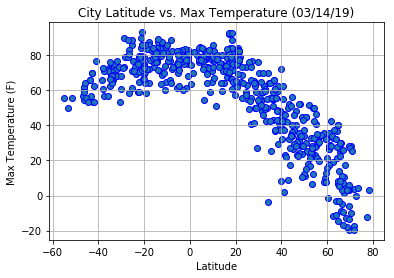

In [20]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Max Temp'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Max Temperature ({})".format(format_date))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig('../Images/Lat_vs_MaxTemp.png')
plt.show()



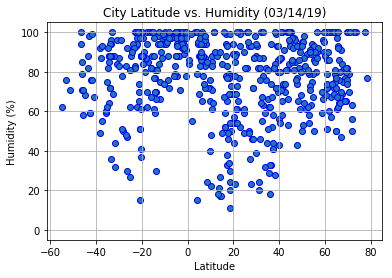

In [21]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Humidity'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Humidity ({})".format(format_date))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.ylim(-5, 105)
plt.savefig('../Images/Lat_vs_Humidity.png')
plt.show()



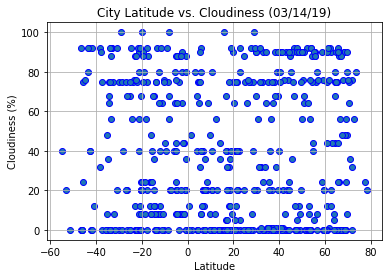

In [22]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Cloudiness'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Cloudiness ({})".format(format_date))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig('../Images/Lat_vs_Cloudiness.png')
plt.show()



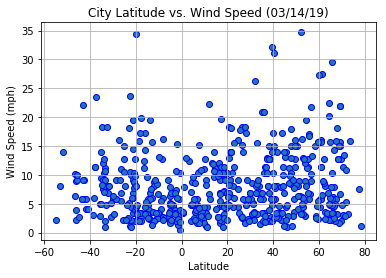

In [23]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Wind Speed'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Wind Speed ({})".format(format_date))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig('../Images/Lat_vs_WindSpeed.png')
plt.show()